In [51]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from tabulate import tabulate
import numpy as np
import seaborn as sns
import time

In [52]:
#imports 2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score


# BALANCEAMENTO DA BASE

In [53]:
#Fazendo leitura da base
df = pd.read_csv("Bases/base_dimensionalidade.csv")

In [54]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [55]:
df.drop(columns=['DOENCAS_CRONICAS'],inplace=True)

In [56]:
df.shape

(32080, 20)

In [57]:
df.columns

Index(['SEXO', 'FAMILIA_MNT_RUIM', 'SALARIO', 'HORAS', 'ESCOLARIDADE',
       'DEPRESSAO', 'MORADIA', 'DOENCA_MENTAL', 'ATV_FISICA', 'ALCOOL',
       'NAO_TRAB_MTV_SAUDE', 'TRABALHA', 'FUMA', 'IMC',
       'PENSAMENTOS_NEGATIVOS', 'ESTADO_SAUDE', 'ALIMENTOS_SAUDAVEIS',
       'CARNES', 'ALIMENTOS_PREJUDICIAIS', 'PROCURA_MEDICA'],
      dtype='object')

In [58]:
X = df.drop(columns=["DEPRESSAO"])
y = df["DEPRESSAO"].copy()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

<Axes: ylabel='count'>

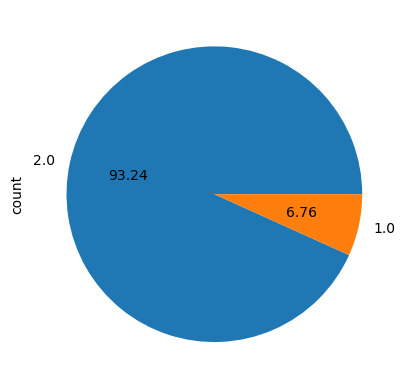

In [60]:
#Verificando proporção da base
y_train.value_counts().plot.pie(autopct='%.2f')

In [61]:
y_train.value_counts()

DEPRESSAO
2.0    23930
1.0     1734
Name: count, dtype: int64

In [62]:
y_test.value_counts()

DEPRESSAO
2.0    5982
1.0     434
Name: count, dtype: int64

In [63]:
X_train.shape

(25664, 19)

In [64]:
X_test.shape

(6416, 19)

#### INICIANDO BALANCEAMENTO

In [65]:
#Importando random UnderSampler
from imblearn.under_sampling import RandomUnderSampler

In [66]:
#definindo o Random UnderSampler
rus = RandomUnderSampler(random_state=42)

In [67]:
#aplicando pra x e y (ambos de treino, sempre de treino)
X_res, y_res = rus.fit_resample(X_train, y_train)

In [68]:
# Recuperar os índices dos dados removidos
removed_indices = rus.sample_indices_
removed_X = X.iloc[removed_indices]
removed_y = y.iloc[removed_indices]

# Adicionar os dados removidos ao X_test e y_test
X_test = pd.concat([X_test, removed_X])
y_test = pd.concat([y_test, removed_y])

In [69]:
X_test.shape

(9884, 19)

In [70]:
y_test.value_counts()

DEPRESSAO
2.0    9239
1.0     645
Name: count, dtype: int64

In [71]:
X_res.shape

(3468, 19)

In [72]:
y_res.value_counts()

DEPRESSAO
1.0    1734
2.0    1734
Name: count, dtype: int64

<Axes: ylabel='count'>

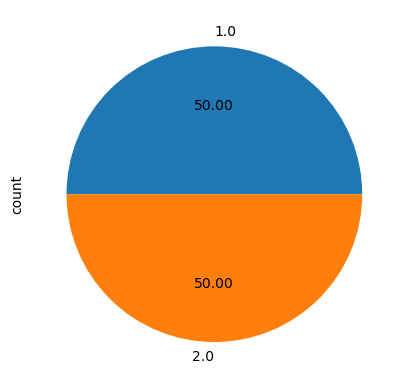

In [73]:
#Visualizando graficamente o balanceamento
y_res.value_counts().plot.pie(autopct='%.2f')

In [74]:
#Visualizando numericamente
y_res.value_counts()

DEPRESSAO
1.0    1734
2.0    1734
Name: count, dtype: int64

### Importando Arquivo da base balanceamento

In [75]:
X_res.to_csv("Bases/base_xtrain.csv")
X_test.to_csv("Bases/base_xtest.csv")
y_res.to_csv("Bases/base_ytrain.csv")
y_test.to_csv("Bases/base_ytest.csv")